# Identifying commercial centers using Points of Interest (POI) data

# [Data Source](https://www.openstreetmap.org/#map=11/28.6518/77.2219)

## Connaught Place (New Delhi)

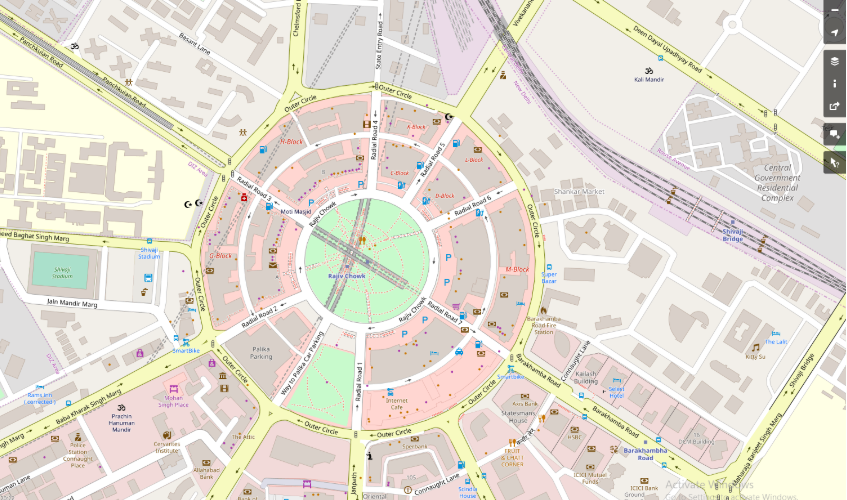

## Importing libraries 


#### Warnings
Warnings messages are typically issued in situations where it is useful to alert the user of some condition in a program, where that condition (normally) doesn’t warrant raising an exception and terminating the program. For example, one might want to issue a warning when a program uses an obsolete module.

#### NumPy
NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays

#### Pandas
Pandas library is one of the things that makes Python a great programming language for data analysis

In [18]:
#importing Libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

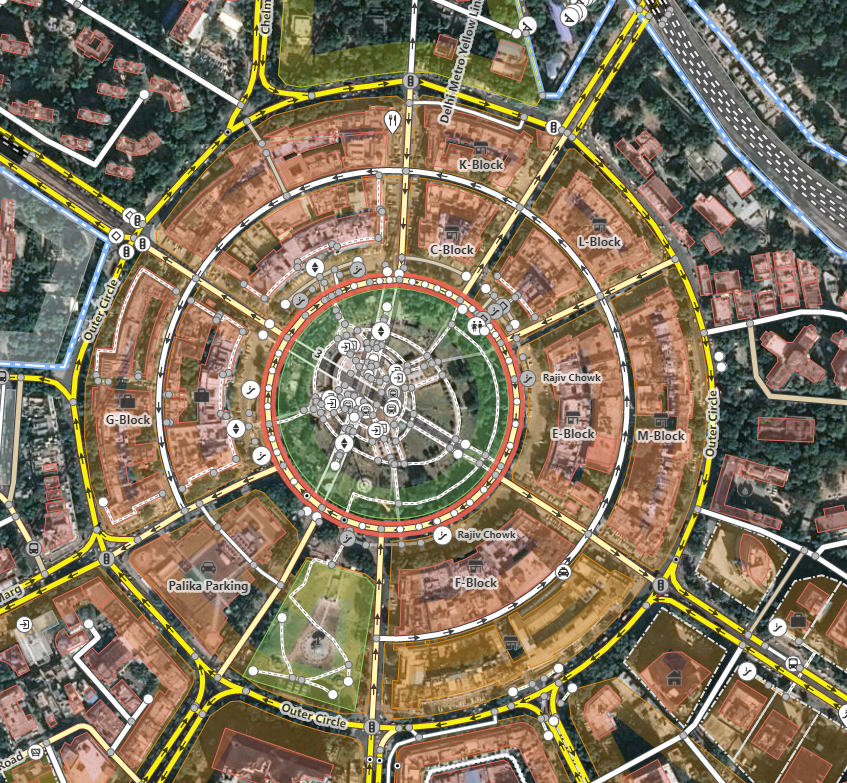

# Data Preprocessing

**Data Information**
Getting datd from [Data](https://www.openstreetmap.org/#map=11/28.6518/77.2219) (**OSM** data at 28.63282,77.22040 (coordinates) .The **OSM** file was converted into **CSV** file.

**About the Data** 
This data is from Canaught place , showing the building's **X** and **Y** coordinates , rest of the data like shop,brand,wikidata,postcode is **NaN**.

In [19]:
# Reading the csv
buildings = pd.read_csv('./buildings.csv')

In [20]:
# Getting the number of Features and Values
buildings.shape

(4713, 11)

## Features and Values

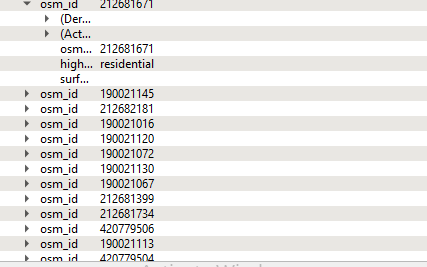

## Buildings mapped using [Potlatch2](https://wiki.openstreetmap.org/wiki/Potlatch_2/Primer)

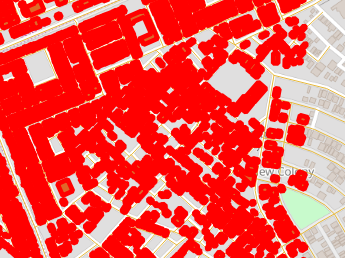

## Data Cleaning

In this section we will be doing univariate analysis and removing outlier/illegitimate values which may be caused due to some error

In [21]:
#Feature and Values.
buildings.head()

,X,Y,osm_id,building,shop,brand,name,addr:housenumber,brand:wikidata,brand:wikipedia,addr:postcode
0,76.997519,28.462437,350032460,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76.996004,28.463159,350005030,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76.995709,28.463582,350004949,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76.996004,28.463686,350004981,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76.995907,28.463866,350004966,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
buildings[0:2]

,X,Y,osm_id,building,shop,brand,name,addr:housenumber,brand:wikidata,brand:wikipedia,addr:postcode
0,76.997519,28.462437,350032460,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76.996004,28.463159,350005030,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
type(buildings.X.values)

numpy.ndarray

# Data-preperation
## Clustering/Segmentation

In [24]:
buildings_cords = pd.DataFrame({'x': buildings.X.values, 'y':buildings.Y.values})

### Applying KMeans Clustering

In [79]:
# clustering
kmeans = KMeans(n_clusters=4, random_state=42).fit(buildings_cords)

In [80]:
# Calculating the centroid 
kmeans.cluster_centers_

array([[ 7.70117406e+01,  2.84668730e+01,  1.00000000e+00],
       [ 7.70068842e+01,  2.84674227e+01, -1.19904087e-14],
       [ 7.70009143e+01,  2.84704862e+01,  2.00000000e+00],
       [ 7.70009628e+01,  2.84649460e+01, -8.88178420e-16]])

In [81]:
# Labeling the centroid
kmeans.labels_

array([3, 3, 3, ..., 0, 0, 0])

### For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

In [82]:
# finding the inertia
kmeans.inertia_

0.04524698764430271

In [83]:
# assigning labels to the values and features
buildings_cords['label'] = kmeans.labels_

#### Representing the final data after clustering and segmentation

In [84]:
buildings_cords

,x,y,label
0,76.997519,28.462437,3
1,76.996004,28.463159,3
2,76.995709,28.463582,3
3,76.996004,28.463686,3
4,76.995907,28.463866,3
...,...,...,...
4708,77.014833,28.472713,0
4709,77.014222,28.472889,0
4710,77.014814,28.472999,0
4711,77.014742,28.473122,0


# Data Visualization part

## Matplotlib is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader SciPy stack

In [85]:
# using matplotlib 
import matplotlib.pyplot as plt

### Statistical Data Visualization

In [86]:
# using seaborn 
import seaborn as sns

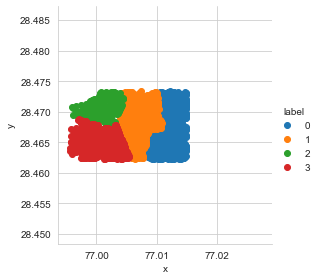

In [87]:
# visualization
sns.set_style('whitegrid');
sns.FacetGrid(buildings_cords, hue='label', size=4) \
.map(plt.scatter, 'x', 'y') \
.add_legend();
plt.show();

# After clustering this data of buildings , we find that the clusters keeps on breaking.But after breaking into four clusters . The value of interia remians almost same and further breaking is not useful

# *Conclusion 
The most effective region to invest here is Blue region with label 0 , since it has the maximum values and it's not breaking into further clusters.